#  Customer Segmentation using Clustering

This notebook demonstrates a comprehensive customer segmentation analysis using the **Mall Customers Dataset**. The goal is to understand and segment customers based on their demographics and spending behaviour using **unsupervised learning** techniques.


##  Project Workflow

### 1. Data Import & Basic Exploration
- Loaded the dataset using `pandas` and checked its structure.
- Conducted an initial overview to understand the number of samples and features.

### 2. Gender-wise Age Distribution
- Visualized the age distribution for **males** and **females** using histograms.
- Used the **Kolmogorov-Smirnov test** to compare age distributions across genders.
- Plotted a **donut chart** to show the gender ratio.

### 3. Income Distribution by Gender
- Compared the annual income for male and female customers using:
  - Histograms
  - Box plots
- Highlighted key statistics like mean, median, and standard deviation.
- Performed another **Kolmogorov-Smirnov test** for statistical comparison.

### 4. Spending Score Analysis
- Analyzed the "Spending Score (1-100)" for both genders.
- Visualized using histograms and box plots.
- Computed descriptive stats and tested distribution similarity.

### 5. Income by Age Group
- Calculated **median income** grouped by **age bins** and gender.
- Bar plot to visualize how income varies across age groups and genders.


##  Clustering Analysis

### 6. Feature Selection
- Selected **Age**, **Annual Income (k$)**, and **Spending Score (1-100)** for clustering.

### 7. Optimal Clusters Determination
- Used the **Elbow Method** and **Silhouette Score** to evaluate optimal cluster count.
- Chose **5 clusters** for final K-Means modeling.

### 8. K-Means Clustering
- Applied **KMeans** with 5 clusters.
- Visualized:
  - Annual Income vs. Spending Score
  - Age vs. Spending Score
- Displayed **cluster centers** and calculated **cluster sizes**.

### 9. 3D Visualization
- Plotted a **3D scatter plot** of customers segmented by clusters based on Age, Income, and Spending Score.


##  Agglomerative Clustering

### 10. Hierarchical Clustering
- Used **Agglomerative Clustering (linkage = average)**.
- Visualised the resulting clusters with a scatter plot.
- Generated **dendrograms** using both **complete** and **average** linkage methods.

### 11. Cluster Size Comparison
- Compared cluster sizes between **K-Means** and **Agglomerative Clustering**.
- Visualised the comparison with a **bar chart**.


##  Summary

This project explored clustering algorithms for segmenting mall customers into meaningful groups based on their purchasing behaviour and demographics. It combined detailed **statistical analysis**, **visual storytelling**, and **unsupervised machine learning** for actionable insights.

---

##  Learning Reflection

This was my **very first hands-on project with Unsupervised Learning**, and it came with its fair share of challenges. I’m proud to have worked through them and completed this assignment successfully.

To deepen my understanding and guide my implementation, I utilized the following helpful resources:
-  YouTube: [Great Learning – K-Means Clustering](https://www.youtube.com/watch?v=-Z_cwgzDfPc)
-  Article: [Towards Data Science – K-Means Clustering](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a/)

These resources helped clarify core concepts and gave me direction on best practices while implementing clustering techniques.



In [1]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Mall_Customers.csv")
print("There are {} rows & {} columns in our dataset.".format(data.shape[0], data.shape[1]))

There are 200 rows & 5 columns in our dataset.


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis:-

###  Age Distribution by Gender

We analyze the age distribution of male and female customers:
- Used `sns.distplot` to plot histograms with fixed bin widths
- Displayed count, mean age, and total customers per gender
- Performed **Kolmogorov-Smirnov test** to check if male and female age distributions differ significantly

Additionally, a donut pie chart visually shows the gender proportion in the dataset.


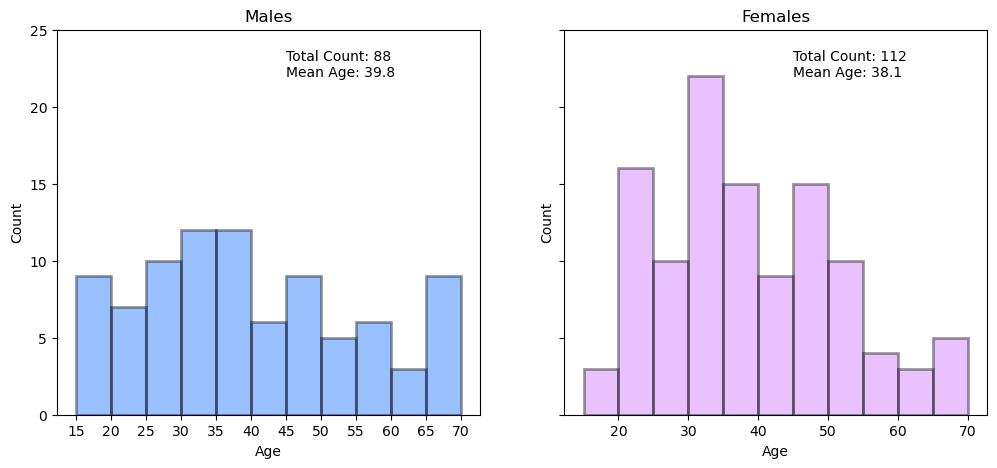

In [7]:
males_age = data [data["Gender"]=="Male"]["Age"] # Subset with males age
females_age = data [data["Gender"]=="Female"]["Age"] # Subset with males age
age_bins = range(15, 75, 5)

# Males Histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.distplot(males_age, bins=age_bins, kde=False, color="#0066ff", ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45,23, "Total Count: {}".format(males_age.count()))
ax1.text(45,22, "Mean Age: {:.1f}".format(males_age.mean()))

# Females Histogram
sns.distplot(females_age, bins=age_bins, kde=False, color="#cc66ff", ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45,23, "Total Count: {}".format(females_age.count()))
ax2.text(45,22, "Mean Age: {:.1f}".format(females_age.mean()))

plt.show()

###  Kolmogorov-Smirnov (KS) Test Explanation:

The Kolmogorov-Smirnov (KS) test is a non-parametric statistical test used to compare two distributions. It checks whether two samples come from the same distribution.

In this analysis, we use the **two-sample KS test** to compare the distributions of `Age`, `Annual Income`, and `Spending Score` between **Male** and **Female** customers.

- **Null Hypothesis (H₀):** The two samples come from the same distribution.
- **Alternative Hypothesis (H₁):** The two samples come from different distributions.
- If **p-value < 0.05**, we reject the null hypothesis and conclude that the distributions are significantly different.

We use the KS test result to support the visual analysis of histograms and boxplots.



In [8]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


The average age of the male customers is slighty higher than females (39.8 vs. 38.1). Distribution of males is more uniform than females, where we can observe that the biggest age group is 30-35 years old. Kolgomorov-Smirnov test shows that the differences between these two groups are statistically insignificant.

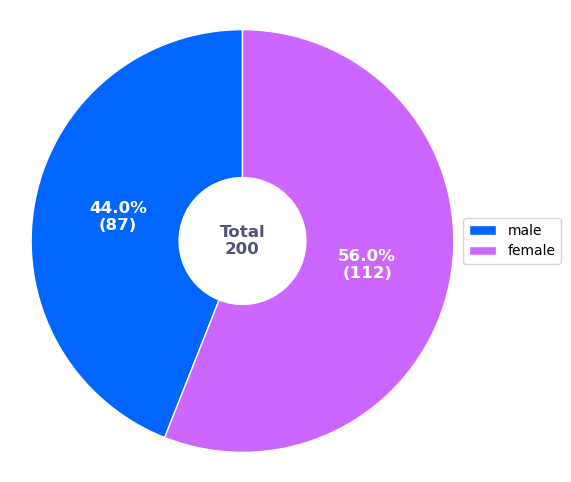

In [9]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes
fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(
    sizes,
    autopct = lambda pct: labeler(pct, sizes),
    radius = 1,
    colors = ["#0066ff", "#cc66ff"],
    startangle = 90,
    textprops = dict(color="w"),
    wedgeprops = dict(width=0.7, edgecolor="w")
)

ax1.legend(
    wedges, ["male", "female"],
    loc="center right",
    bbox_to_anchor= (0.7, 0, 0.5, 1)
)

plt.text(0,0, "Total\n{}".format(data["Age"].count()),
    weight = "bold", size=12, color="#52527a",
    ha = "center", va = "center")

plt.setp(autotexts, size=12, weight="bold")
ax1.axis("equal")
plt.show()

There are slightly more females customers than males. Females are 56% and males are 44% of total customers.

###  Annual Income Analysis by Gender

This part compares the annual income distribution for males and females:
- Used `sns.histplot` for histogram comparison
- Displayed mean, median, and standard deviation for each gender
- Added a boxplot to compare overall distribution
- Another KS test is performed to statistically compare both distributions


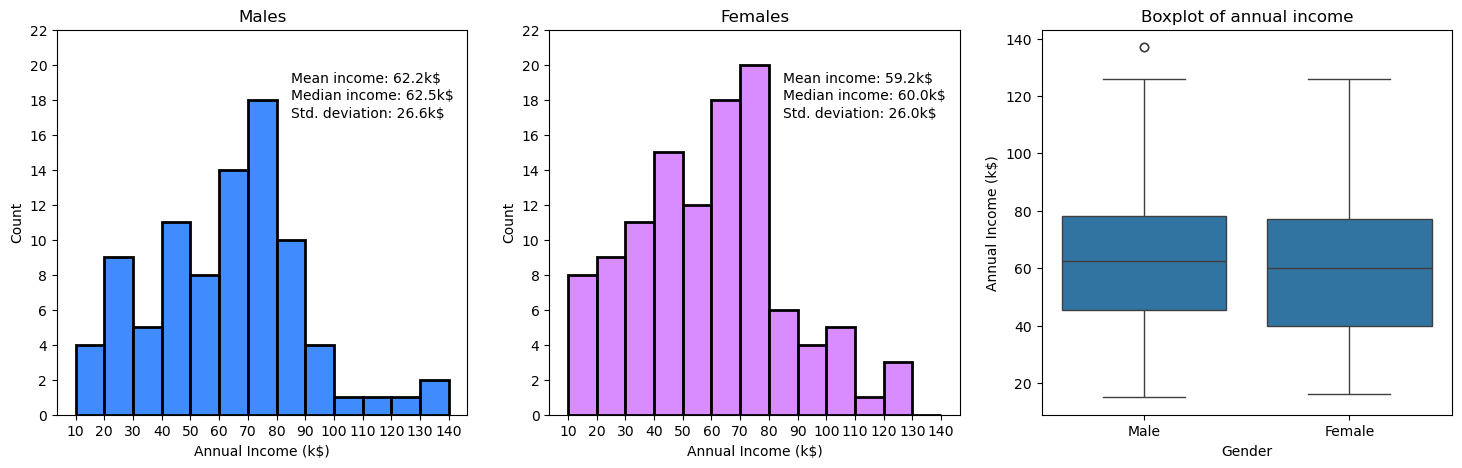

In [10]:
males_income = data[data["Gender"]=="Male"]["Annual Income (k$)"] #  subset with males income
females_income = data[data["Gender"]=="Female"]["Annual Income (k$)"] #  subset with males income

my_bins = range(10, 150,10)

# Males Histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(males_income, bins=my_bins, kde=False, color="#0066ff", ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85, 18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Female Histogram
sns.histplot(females_income, bins=my_bins, kde=False, color="#cc66ff", ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(85, 19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85, 18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85, 17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# box plot
sns.boxplot(x="Gender", y="Annual Income (k$)", data=data, ax=ax3)
ax3.set_title("Boxplot of annual income")
plt.show()

In [11]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


Mean income of males is higher than females. Also median income of male customers 62.5k$ is higher than females 60k$. Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. K-S test shows that these two groups are not statistically different.

###  Spending Score Analysis by Gender

Spending score (ranging 1–100) is analyzed in the same way:
- Histograms with KDE disabled to observe raw counts
- Boxplot highlights differences in score distribution between genders
- KS test again checks if distributions differ significantly


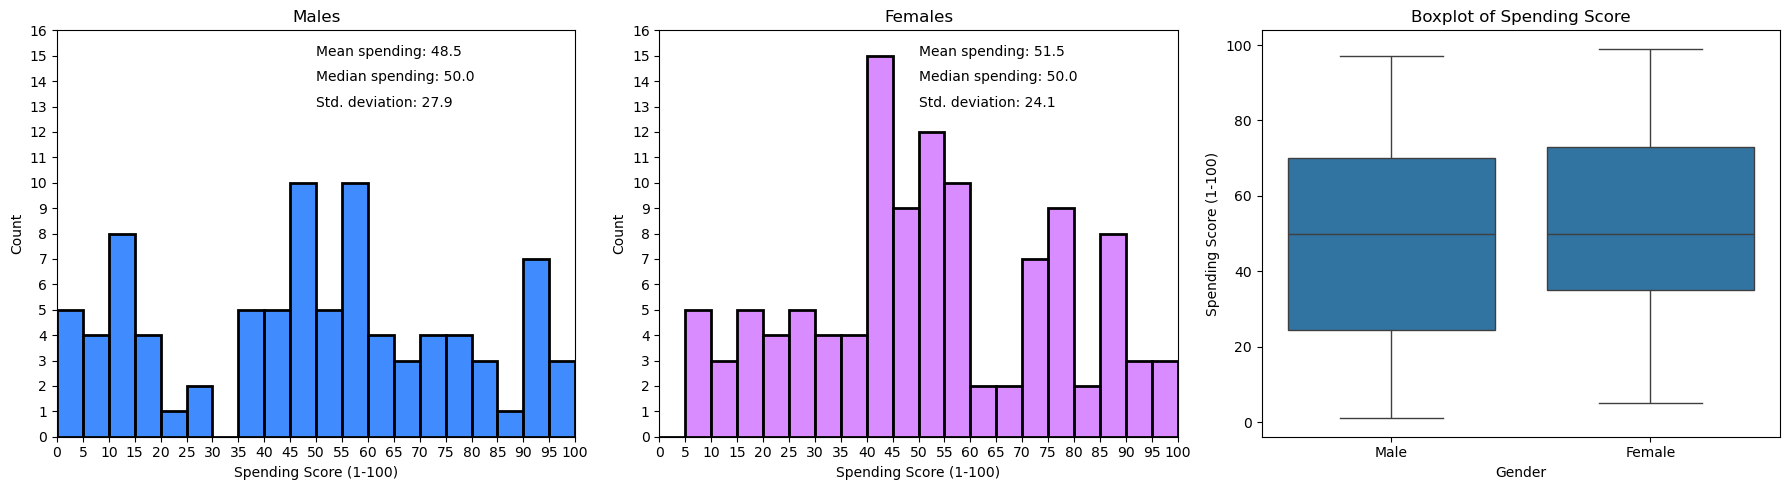

In [12]:
males_spending = data[data["Gender"] == "Male"]["Spending Score (1-100)"]
females_spending = data[data["Gender"] == "Female"]["Spending Score (1-100)"]

spending_bins = range(0, 105, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Males Histogram
sns.histplot(males_spending, bins=spending_bins, kde=False, color="#0066ff", ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_yticks(range(0, 17, 1))
ax1.set_ylim(0, 16)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(50, 15, "Mean spending: {:.1f}".format(males_spending.mean()))
ax1.text(50, 14, "Median spending: {:.1f}".format(males_spending.median()))
ax1.text(50, 13, "Std. deviation: {:.1f}".format(males_spending.std()))

# Females Histogram
sns.histplot(females_spending, bins=spending_bins, kde=False, color="#cc66ff", ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(spending_bins)
ax2.set_xlim(0, 100)
ax2.set_yticks(range(0, 17, 1))
ax2.set_ylim(0, 16)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(50, 15, "Mean spending: {:.1f}".format(females_spending.mean()))
ax2.text(50, 14, "Median spending: {:.1f}".format(females_spending.median()))
ax2.text(50, 13, "Std. deviation: {:.1f}".format(females_spending.std()))

# Box plot
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data, ax=ax3)
ax3.set_title("Boxplot of Spending Score")
plt.tight_layout()
plt.show()


In [13]:
print("Kolgomorov-Smirnov test p-value: {:.2f}".format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


A mean spending score for women is higher than men. The K-S test value indicated that there is no evidence to reject the null hypothesis. However, the evidence is not so strong as in previous comparison. Next, I'll calculate median income for all age groups.

In [14]:
median_by_age_group = data.groupby(["Gender", pd.cut(data["Age"], age_bins)]).median(numeric_only=True)

median_by_age_group.index = median_by_age_group.index.set_names(["Gender", "Age Group"])

median_by_age_group.reset_index(inplace=True)


###  Median Income by Age Group and Gender

Grouped customers into age bins of 5 years, then calculated the **median annual income** within each bin for both genders.  
This barplot helps identify:
- Which age group earns the most
- How male and female income trends vary with age


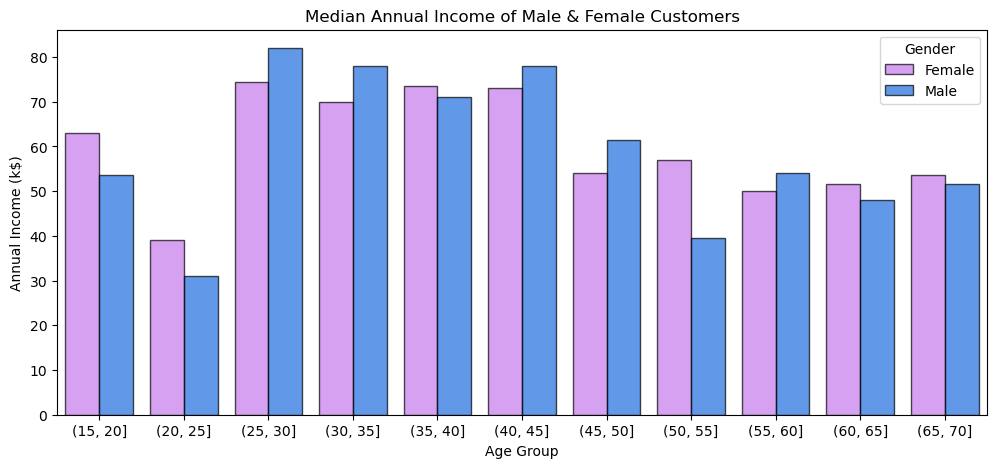

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(
    x="Age Group", y="Annual Income (k$)", hue="Gender", data=median_by_age_group,
    palette=["#cc66ff", "#0066ff"],
    alpha=0.7, edgecolor="k",
    ax=ax
)
ax.set_title("Median Annual Income of Male & Female Customers")
ax.set_xlabel("Age Group")
plt.show()


# Clustering:-
1. KMeans
2. Hierarical 

## KMeans

###  K-Means Clustering Preparation

Used only **numeric features** for clustering:
- Age
- Annual Income (k$)
- Spending Score (1-100)

We tested multiple cluster sizes (`n_clusters` from 2 to 10) using:
- **Inertia (within-cluster sum of squares)** to apply the **Elbow Method**
- **Silhouette Score** to evaluate cluster cohesion and separation
These help identify the optimal number of clusters.


For clustering only numeric columns are used.

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognized as a cluster.

In [16]:
X_numeric = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In order to find an appropriate number of clusters, the elbow method will be used. In this method, the inertia for a number of a clusters between 2 & 10 will be calculated. This rule is to choose the number of cluster where you see a kink or "an elbow in the graph"

###  Silhouette Score – Clustering Evaluation Metric

The **Silhouette Score** is a metric used to measure how well each data point fits within its assigned cluster, compared to other clusters.

It considers two key factors:
- **a** = Mean intra-cluster distance (how close a point is to others in the same cluster)
- **b** = Mean nearest-cluster distance (how close a point is to the next nearest cluster)

The **Silhouette Coefficient** for each sample is calculated as:

\[
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
\]

- The score ranges from **-1 to 1**:
  - **+1** → well-clustered, clearly assigned
  - **0** → on or very close to the decision boundary
  - **-1** → possibly assigned to the wrong cluster

We compute the **average silhouette score** for all samples to evaluate overall clustering quality. A **higher score** means **better-defined clusters**.

In this analysis, we use the silhouette score to help choose the optimal number of clusters in K-Means.


In [17]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # No. of Clusters
clusters_inertia = []  # Inertia for Elbow method
s_score = []  # Silhouette Scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init="k-means++", random_state=42).fit(X_numeric)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(X_numeric, KM_est.labels_)
    s_score.append(silhouette_avg)

The graph below show the inertia for the selected range of clusters.

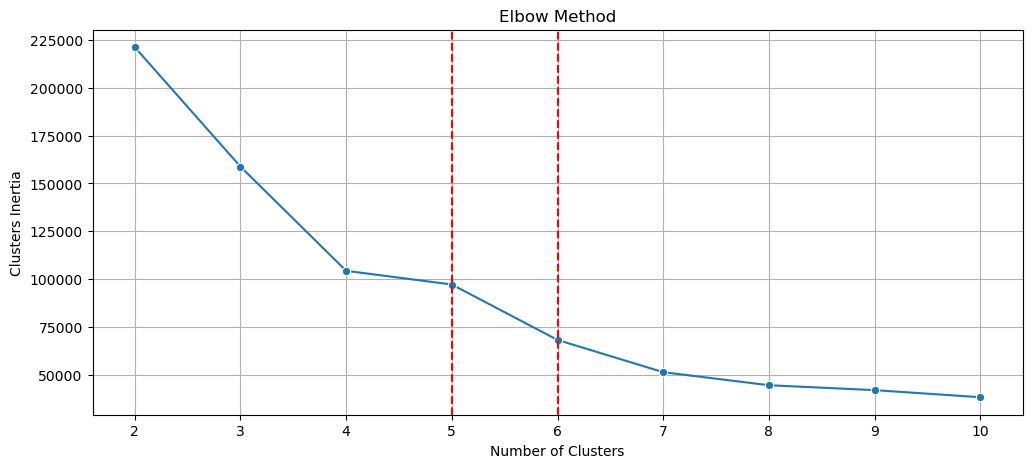

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=clusters_inertia, marker="o", ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Clusters Inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


There is no clear "elbow" visible. A choice of 5 or 6 clusters seem to be fair. Let's see the silhouette score.

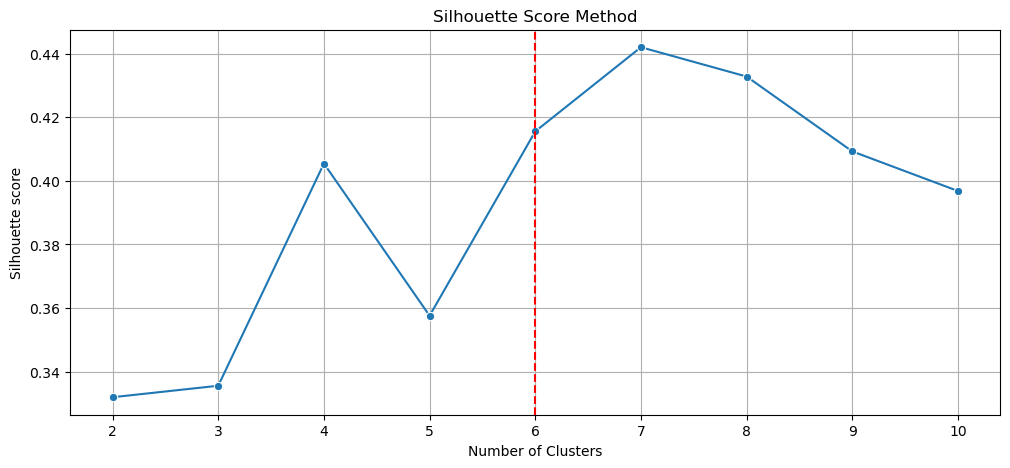

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_score, marker="o", ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


## 5 Clusters

###  K-Means Clustering & Visualization (5 Clusters)

Based on evaluation, `n_clusters=5` was selected.

We:
- Applied KMeans and labeled each customer with a cluster
- Created scatter plots to show:
  - **Annual Income vs Spending Score**
  - **Age vs Spending Score**
- Plotted cluster centers for better interpretability


In [20]:
KM_5_Clusters = KMeans(n_clusters=5, init= "k-means++").fit(X_numeric) # Initialize & Fit K-Means Model

KMS_Clustered = X_numeric.copy()
KMS_Clustered.loc[:,"Cluster"] = KM_5_Clusters.labels_ 

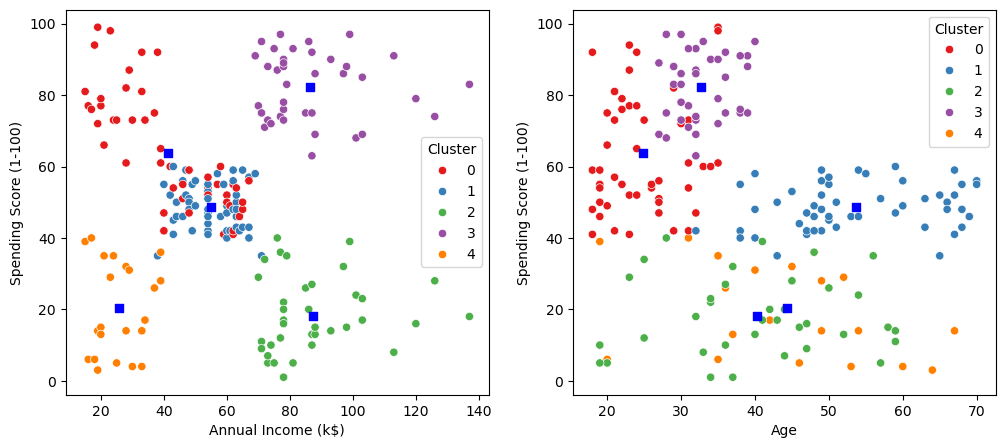

In [21]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Annual Income vs Spending Score
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)", data=KMS_Clustered,
    hue="Cluster", ax=axes[0], palette="Set1", legend="full"
)

# Plot 2: Age vs Spending Score
sns.scatterplot(
    x="Age", y="Spending Score (1-100)", data=KMS_Clustered,
    hue="Cluster", ax=axes[1], palette="Set1", legend="full"
)

# Add cluster centers (assuming correct indices for columns)
axes[0].scatter(KM_5_Clusters.cluster_centers_[:, 1], KM_5_Clusters.cluster_centers_[:, 2],
                marker="s", s=40, c="blue")
axes[1].scatter(KM_5_Clusters.cluster_centers_[:, 0], KM_5_Clusters.cluster_centers_[:, 2],
                marker="s", s=40, c="blue")

plt.show()


K-Means algorithm generated the following 5 clusters:
* customers with **low** annual income & __high__ spending score
* customer with **medium** annual income & **medium** spending score
* customer with **high** annual income & **low** spending score
* customer with **high** annual income & **high** spending score
* customer with **low** annual income & **low** spending score

#### Sizes of the clusters

In [22]:
KMS_clust_sizes = KMS_Clustered.groupby("Cluster").size().to_frame()
KMS_clust_sizes.columns = ["KMS_size"]
KMS_clust_sizes = KMS_clust_sizes.sort_index()
KMS_clust_sizes


,KMS_size
Cluster,
0,50
1,52
2,37
3,39
4,22


The biggest cluster is a cluster number 2 with 80 observations. There are two small cluster with 22 & 23 observations.

###  3D Cluster Visualization

Used `matplotlib`'s 3D plotting (`Axes3D`) to visualize how customers are grouped across all three dimensions:
- Age
- Income
- Spending Score

Color-coded by cluster for better differentiation.  
This helps spot outliers and overlapping clusters.


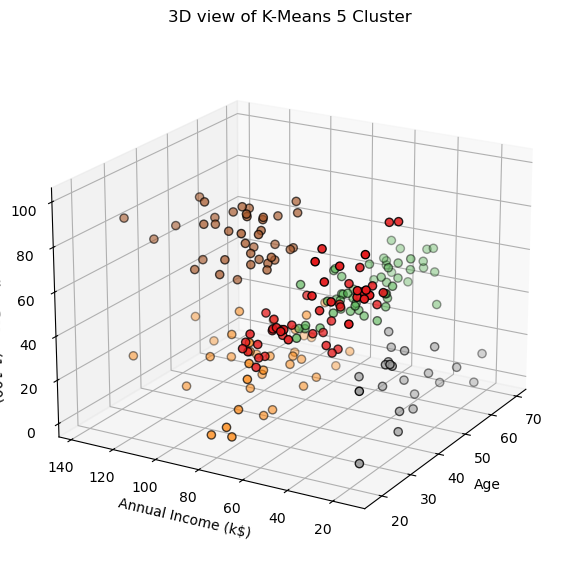

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=210)

# 3D Scatter plot
ax.scatter(
    KMS_Clustered["Age"],
    KMS_Clustered["Annual Income (k$)"],
    KMS_Clustered["Spending Score (1-100)"],
    c=KMS_Clustered["Cluster"],  # Make sure the column name is "Cluster"
    s=35,
    edgecolor="k",
    cmap=plt.cm.Set1
)

# Set axis labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D view of K-Means 5 Cluster")

plt.show()


## 6 Cluster

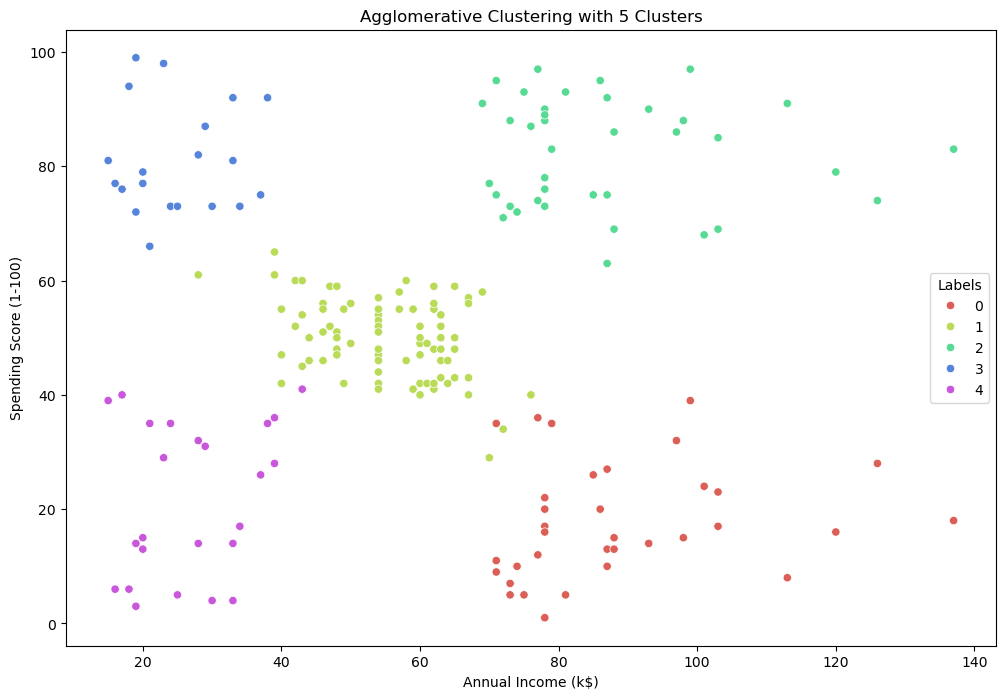

In [24]:
from sklearn.cluster import AgglomerativeClustering


# Perform Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=5, linkage="average").fit(X_numeric)

# Add the cluster labels to the dataframe
X_numeric["Labels"] = agglom.labels_

# Visualize the clusters
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=X_numeric["Annual Income (k$)"],
    y=X_numeric["Spending Score (1-100)"],
    hue=X_numeric["Labels"],
    palette=sns.color_palette("hls", 5)
)

plt.title("Agglomerative Clustering with 5 Clusters")
plt.show()



In [25]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X_numeric, X_numeric)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


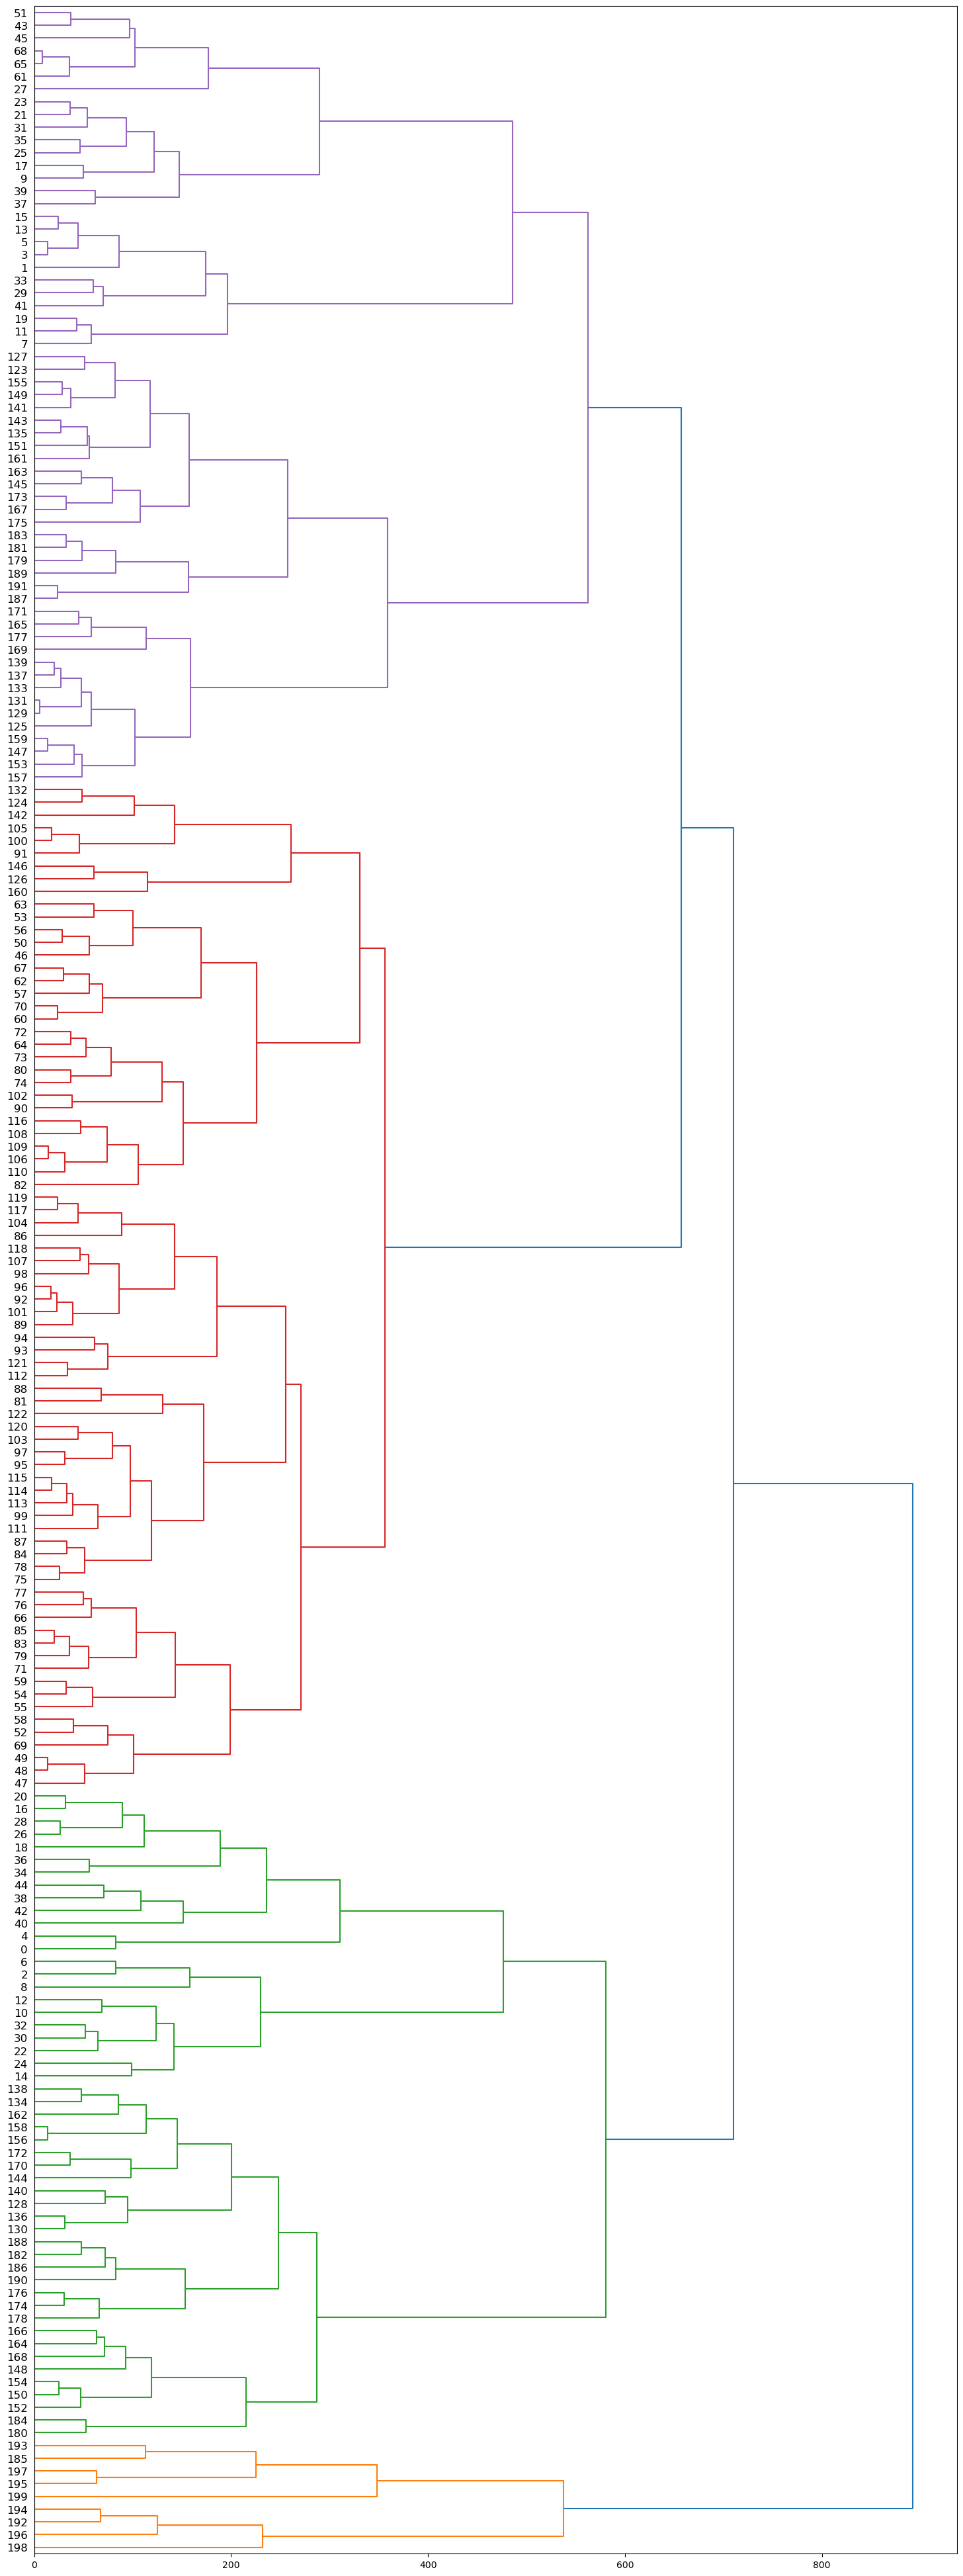

In [26]:
Z = hierarchy.linkage(dist, "complete")
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation="right")

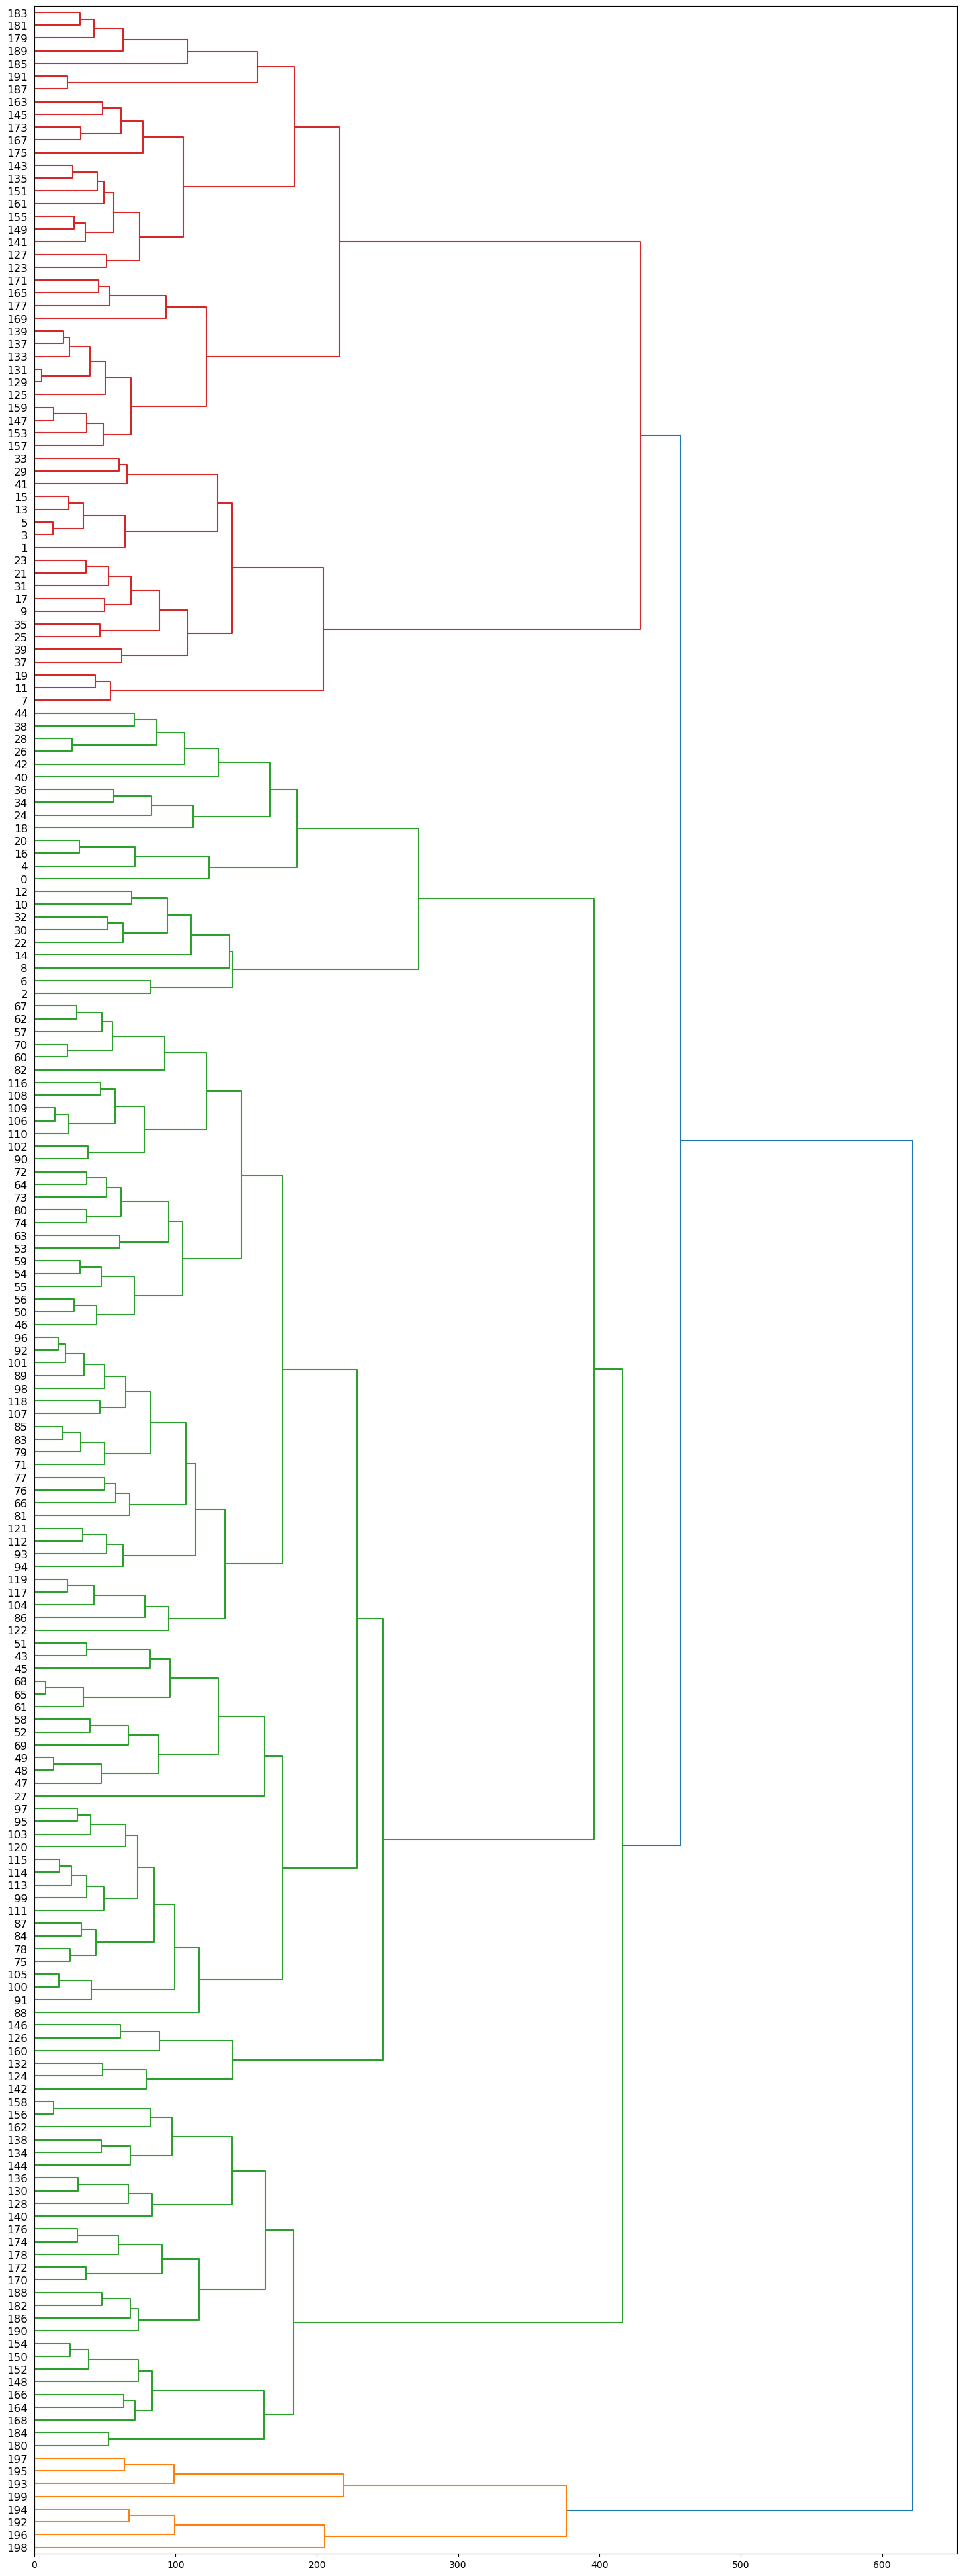

In [27]:
Z = hierarchy.linkage(dist, "average")
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation="right")

In [28]:
Agg_clustered = X_numeric.copy()
Agg_clustered.loc[:, "Cluster"] = agglom.labels_  # append lable to points

In [29]:
Agg_clust_sizes = Agg_clustered.groupby("Cluster").size().to_frame()
Agg_clust_sizes.columns = ["Agg_size"]
Agg_clust_sizes

,Agg_size
Cluster,
0,35
1,82
2,39
3,20
4,24


Looking into the cluster sizes across all the algorithms.

In [30]:
clusters = pd.concat([KMS_clust_sizes, Agg_clust_sizes], axis=1, sort=False)
clusters

,KMS_size,Agg_size
Cluster,,
0,50,35
1,52,82
2,37,39
3,39,20
4,22,24


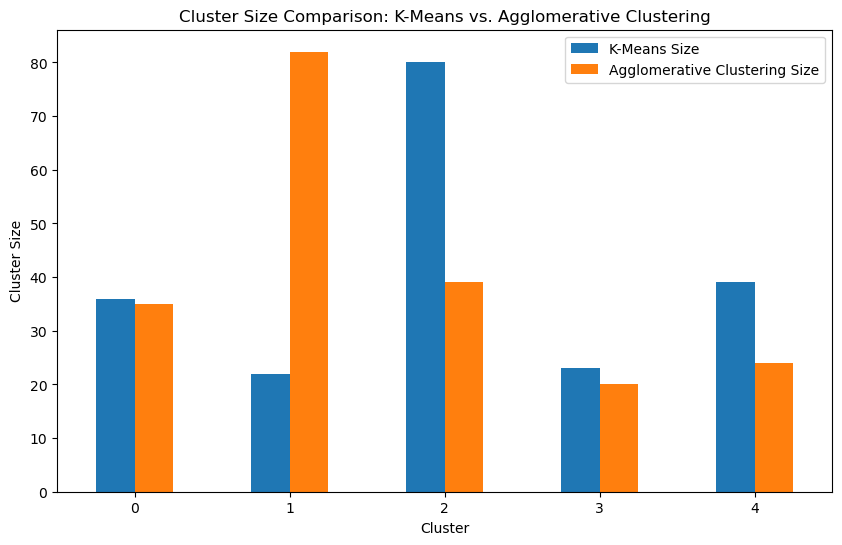

In [31]:

# Create a DataFrame with the cluster sizes for comparison
cluster_comparison = pd.DataFrame({
    'K-Means Size': [36, 22, 80, 23, 39],
    'Agglomerative Clustering Size': [35, 82, 39, 20, 24]
}, index=[0, 1, 2, 3, 4])

# Plot the comparison
cluster_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Size Comparison: K-Means vs. Agglomerative Clustering')
plt.ylabel('Cluster Size')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()
